# Logistic Regression

It is used for classification tasks.

Sigmoid function. Gives a 0 or 1 as the output

Can be used for binary classification and even for multiclass classification.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.datasets
from sklearn.model_selection import train_test_split

## Logistic Regression on a sample Dataset

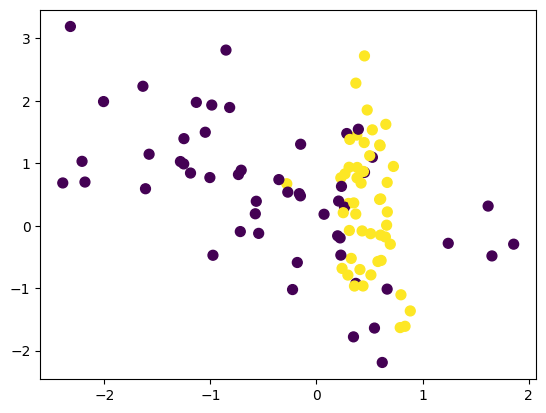

In [2]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples = 100, n_features= 2,n_redundant=0,  n_informative = 2, n_classes= 2, n_clusters_per_class= 1,  flip_y = 0.1, class_sep= 0.5,  random_state = 0)
plt.scatter(X[:,0],X[:,1],c=y,marker='o',s=50);
plt.show()

In [3]:
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

clf = LogisticRegression()
clf.fit(X_train,y_train)

print('Accuracy of Logistic Regression Classifier on training data: {:.2f}' .format(clf.score(X_train,y_train)))
print('Accuracy of Logistic Regression Classifier on test data: {:.2f}' .format(clf.score(X_test,y_test)))

Accuracy of Logistic Regression Classifier on training data: 0.81
Accuracy of Logistic Regression Classifier on test data: 0.84


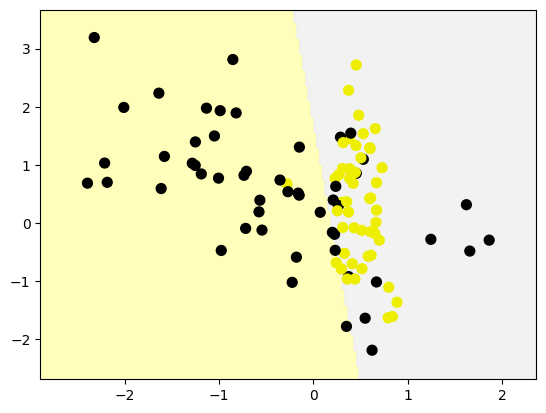

In [4]:
# Visualising the Logistic Regression Classifier
from matplotlib.colors import ListedColormap
numClasses = np.amax(y) + 1
color_list_bold = ['#000000', '#EEEE00', '#00CC00', '#0000CC']
cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

plt.figure()

h = 0.03
k = 0.5
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()
x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
P = P.reshape(x2.shape)


color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
cmap_light = ListedColormap(color_list_light[0:numClasses])

plt.contourf( x2, y2, P, alpha = 0.8,cmap=cmap_light)   #contour plo

plt.scatter(X[:,0],X[:,1],c=y,marker='o',s=50,cmap=cmap_bold)

# Code credits: Coursera --> Michigan University Data Science course

## Logistic Regression on a real dataset

In [27]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X,y=load_breast_cancer(return_X_y=True)

In [28]:
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

clf=LogisticRegression()
clf.fit(X_train,y_train)

print('Breast Cancer Dataset')
print('Accuracy of Logistic Regression Classifier on training Data: {:.3f}' .format(clf.score(X_train,y_train)))
print('Accuracy of Logistic Regression Classifier on test data: {:.3f}' .format(clf.score(X_test,y_test)))

Breast Cancer Dataset
Accuracy of Logistic Regression Classifier on training Data: 0.946
Accuracy of Logistic Regression Classifier on test data: 0.944


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Logistic Regression and regularization

The C parameter is used for controlling regularization in Logistic Regression

By default L2 regularization, like ridge regression is used

Here 'Higher' values of 'C' correspond to less Regularization

In [29]:
for this_C in [0.0001,0.001,0.5,1.0,10.0,100000.0]:
  clf=LogisticRegression(C=this_C)
  clf.fit(X_train,y_train)
  print('For C= {}, Accuracy on train data= {:.2f}' .format(this_C,clf.score(X_train,y_train)))
  print('For C= {}, Accuracy on test data= {:.2f}' .format(this_C,clf.score(X_test,y_test)))

For C= 0.0001, Accuracy on train data= 0.93
For C= 0.0001, Accuracy on test data= 0.94
For C= 0.001, Accuracy on train data= 0.92
For C= 0.001, Accuracy on test data= 0.94
For C= 0.5, Accuracy on train data= 0.95
For C= 0.5, Accuracy on test data= 0.94
For C= 1.0, Accuracy on train data= 0.95
For C= 1.0, Accuracy on test data= 0.94
For C= 10.0, Accuracy on train data= 0.95
For C= 10.0, Accuracy on test data= 0.94
For C= 100000.0, Accuracy on train data= 0.95
For C= 100000.0, Accuracy on test data= 0.94


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

# Support Vector Machines

Linear Support Vector Machine

Uses 'sign' function to classify the data

=sign(mx+c)

Classifier Margin

Maximum margin classifier: LSVM

Regularization is done using the C parameter

In [32]:
from sklearn.svm import LinearSVC

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

clf=LinearSVC(C=10).fit(X_train,y_train)

print('Breast Cancer Dataset')
print('Accuracy of SVC classifier on training data: {:.2f}' .format(clf.score(X_train,y_train)))
print('Accuracy of SVC classifier on test data: {:.2f}' .format(clf.score(X_test,y_test)))

Breast Cancer Dataset
Accuracy of SVC classifier on training data: 0.93
Accuracy of SVC classifier on test data: 0.94


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Multi class Classification

The scikit learn library itself learns about the multiple categories present in the dataset and creates multiple binary classifiers for this multiclass dataset

In [9]:
dir(sklearn.datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arff_parser',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'data',
 'descr',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerb

We can use the iris plants dataset which contains 3 different classes

**Only using 2 features for this example in order to visualise the multi class classification**

In [35]:
from sklearn.datasets import load_iris
iris = load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['target']=iris.target
df.head()

X=df.drop(['target','sepal width (cm)','sepal length (cm)'],axis=1)
y=df['target']
X.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


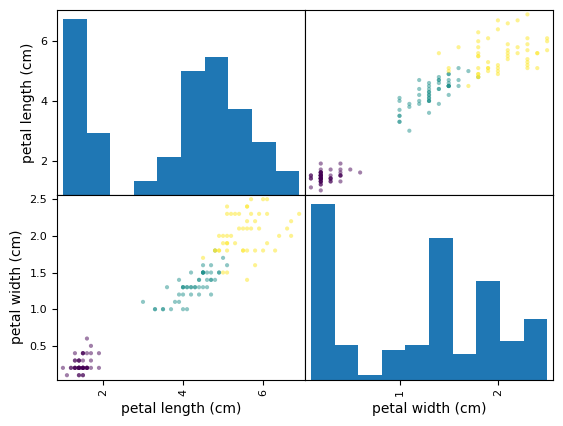

In [11]:
pd.plotting.scatter_matrix(X,c=y);

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [13]:
from sklearn.svm import LinearSVC

clf= LinearSVC(C=4,random_state=20).fit(X_train,y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

Coefficients:
 [[-0.78579474 -0.7345341 ]
 [ 0.57797498 -1.20445946]
 [ 0.47658254  2.00375297]]
Intercepts:
 [ 2.45743651 -1.11565782 -5.56292867]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


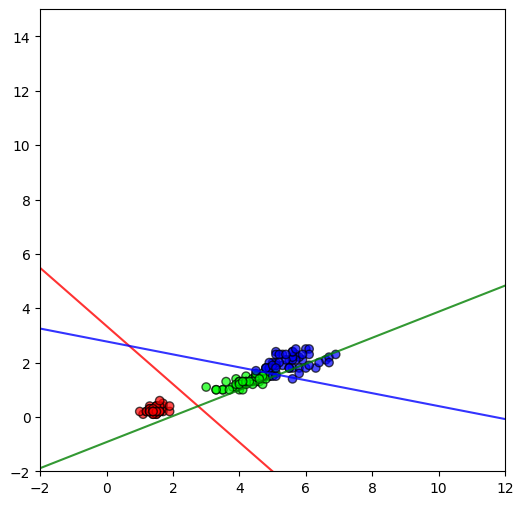

In [14]:
plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.scatter(X[['petal length (cm)']], X[['petal width (cm)']],
           c=y, cmap=cmap_fruits, edgecolor = 'black', alpha=.7)

x_0_range = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b,
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)



plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()

In [36]:
X=df.drop(['target'],axis=1)
y=df['target']
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [23]:
from sklearn.svm import LinearSVC

clf= LinearSVC(C=4,random_state=20).fit(X_train,y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)
print('Linear svm training Score: {:.2f}' .format(clf.score(X_train,y_train)))
print('Linear svm test Score: {:.2f}' .format(clf.score(X_test,y_test)))

Coefficients:
 [[ 0.30103918  0.37287038 -0.9861397  -0.5045627 ]
 [-0.06532495 -0.86991279  0.501863   -1.07675915]
 [-1.39123878 -0.89501561  2.12395794  1.96138714]]
Intercepts:
 [ 0.13755986  2.11075374 -2.17024736]
Linear svm training Score: 0.98
Linear svm test Score: 0.92


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Kernelized SVMs

When classifying a multi-class dataset, Simple linear SVM may not be able to classify all the classes successfully.

Here it uses kernels which is converting from a dimension to a higher dimension

Parameters to be controlled:

1) Kernel: type of kernel function to be used

default: 'rbf', others: 'poly'

2) gamma : rbf kernel width

3) C: regularization parameter (typically tuned at the same time gamma and C)

Increasing gamma overfitting


Training model on iris dataset

In [37]:
y.head()
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
from sklearn.svm import SVC

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

clf = SVC(kernel='poly',degree=2)
clf.fit(X_train,y_train)

print('Polynomial (deg=2) kernel svm training Score: {:.2f}' .format(clf.score(X_train,y_train)))
print('Polynomial (deg=2) kernel svm test Score: {:.2f}' .format(clf.score(X_test,y_test)))

Polynomial (deg=2) kernel svm training Score: 0.99
Polynomial (deg=2) kernel svm test Score: 0.97


In [41]:
clf = SVC(kernel='rbf',gamma=0.01)
clf.fit(X_train,y_train)

print('Rbf kernel svm training Score: {:.2f}' .format(clf.score(X_train,y_train)))
print('Rbf kernel svm test Score: {:.2f}' .format(clf.score(X_test,y_test)))

Rbf kernel svm training Score: 0.94
Rbf kernel svm test Score: 0.92


In [42]:
for this_gamma in [0.01, 1.0, 10.0]:
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    print('Rbf kernel svm gamma: {}, training Score: {:.2f}' .format(this_gamma,clf.score(X_train,y_train)))
    print('Rbf kernel svm gamma: {}, test Score: {:.2f}' .format(this_gamma,clf.score(X_test,y_test)))

Rbf kernel svm gamma: 0.01, training Score: 0.94
Rbf kernel svm gamma: 0.01, test Score: 0.92
Rbf kernel svm gamma: 1.0, training Score: 0.97
Rbf kernel svm gamma: 1.0, test Score: 0.97
Rbf kernel svm gamma: 10.0, training Score: 1.00
Rbf kernel svm gamma: 10.0, test Score: 0.92


C parameter can also be set and data normalization using MinMax Scaler can be achieved